In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import classification_report

2022-05-26 13:59:51.426299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 13:59:51.426321: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('data/thresh01.csv')
df = shuffle(df)
df.head()

,userMediaCount,medLikeNumbers,medCommentNumbers,medHashtagNumbers,medUploadIntervals,medUploadHours,countHasLocationInfo,followerCount,followingCount,hasExternalUrl,tagCounts,biographyLength,usernameLength,isFake
1380,62,55.0,0.0,1.0,4.0,17.0,37,369,587,0,0,95,12,0
360,6,19.0,0.0,0.0,2.0,12.5,0,206,42,1,2,21,8,1
1239,24,55.5,0.0,1.0,11.0,15.0,15,192,220,0,7,0,15,0
921,113,39.0,0.0,0.0,7.0,17.0,15,714,1601,0,0,0,15,0
13,48,37.5,1.0,3.0,14.0,15.0,41,2131,4278,1,73,116,9,1


In [3]:
X = df.drop('isFake', axis=1)
y = df['isFake'].values

In [4]:
scaler = MinMaxScaler()
X_numeric = X.drop(['hasExternalUrl'], axis=1)
X_numeric = scaler.fit_transform(X_numeric)
X = np.concatenate([X_numeric, X[['hasExternalUrl']]], axis=1)

In [5]:
one_hot_encoder = OneHotEncoder()
y = one_hot_encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
model = Sequential()
model.add(Dense(32, input_dim=len(df.columns) - 1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

2022-05-26 13:59:53.243051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-26 13:59:53.243071: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-26 13:59:53.243088: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fatemeh): /proc/driver/nvidia/version does not exist
2022-05-26 13:59:53.243261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 0.7051 - accuracy: 0.5670
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.7932
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.8485
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8782
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8802
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8690
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8864
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8884
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8987
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9038
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9365
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9365
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9304
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9304
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9335
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9376
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9396
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9376
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.9335
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9437
Epoch 93/100


In [10]:
y_pred = model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

14/14 [==============================] - 1s 1ms/step


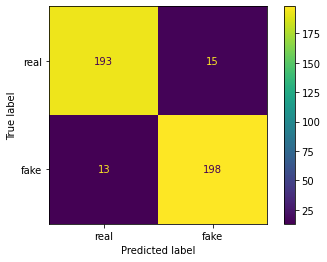

In [11]:
cm = confusion_matrix(test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['real', 'fake'])
cmd.plot()

In [12]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       208
           1       0.93      0.94      0.93       211

    accuracy                           0.93       419
   macro avg       0.93      0.93      0.93       419
weighted avg       0.93      0.93      0.93       419

